In [1]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw

In [2]:
# molecule from canonical smiles 
# Syringic acid
molecule = Chem.MolFromSmiles('C1=CC(=C(C=C1C2=[O+]C3=CC(=CC(=C3C=C2OC4C(C(C(C(O4)CO)O)O)O)O)O)O)O')

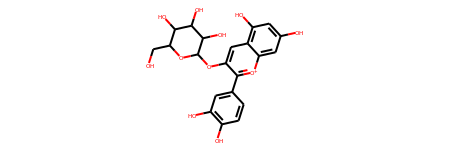

In [3]:
molecule

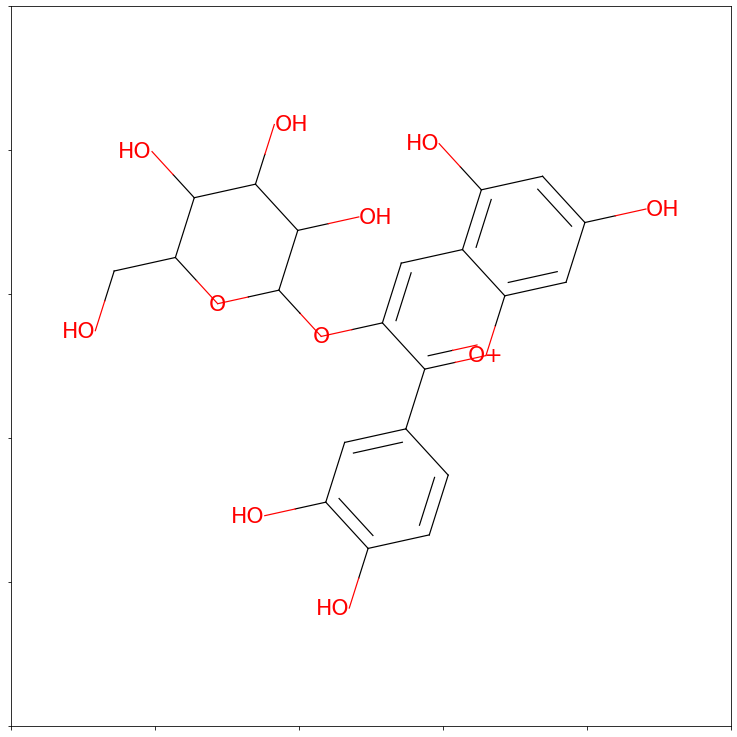

In [7]:
fig = Draw.MolToMPL(molecule, size=(400, 400))

## Add Atom Index to molecule

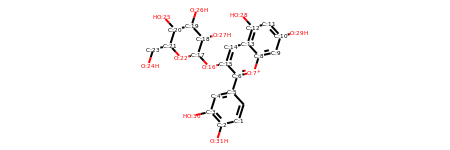

In [8]:
molecule2 = molecule
def mol_with_atom_index(mol):
    for atom in mol.GetAtoms():
        atom.SetAtomMapNum(atom.GetIdx())
    return mol

mol_with_atom_index(molecule2)

## Compute Gasteiger Charges

In [9]:
AllChem.ComputeGasteigerCharges(molecule)

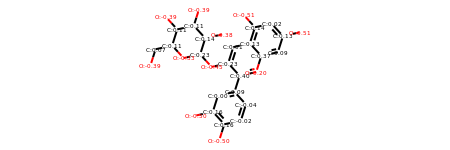

In [10]:
m2 = Chem.Mol(molecule)
for at in m2.GetAtoms():
    lbl = '%s:%.2f'%(at.GetSymbol(),at.GetDoubleProp("_GasteigerCharge"))
    at.SetProp('atomLabel',lbl)
m2
#Draw.MolToMPL(m2, size=(200, 200))

# Covert to SDF Format

In [11]:
AllChem.Compute2DCoords(molecule)

0

In [12]:
print(Chem.MolToMolBlock(molecule))


     RDKit          2D

 32 35  0  0  0  0  0  0  0  0999 V2000
    2.0558   -3.8693    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.6039   -5.2996    0.0000 C   0  0  0  0  0  0  0  0  0  1  0  0
    0.1393   -5.6235    0.0000 C   0  0  0  0  0  0  0  0  0  2  0  0
   -0.8735   -4.5170    0.0000 C   0  0  0  0  0  0  0  0  0  3  0  0
   -0.4216   -3.0867    0.0000 C   0  0  0  0  0  0  0  0  0  4  0  0
    1.0430   -2.7628    0.0000 C   0  0  0  0  0  0  0  0  0  5  0  0
    1.4948   -1.3325    0.0000 C   0  0  0  0  0  0  0  0  0  6  0  0
    2.9594   -1.0086    0.0000 O   0  0  0  0  0  3  0  0  0  7  0  0
    3.4113    0.4217    0.0000 C   0  0  0  0  0  0  0  0  0  8  0  0
    4.8759    0.7456    0.0000 C   0  0  0  0  0  0  0  0  0  9  0  0
    5.3277    2.1759    0.0000 C   0  0  0  0  0  0  0  0  0 10  0  0
    4.3150    3.2824    0.0000 C   0  0  0  0  0  0  0  0  0 11  0  0
    2.8503    2.9585    0.0000 C   0  0  0  0  0  0  0  0  0 12  0  0
    2.3985    1.5282    0

In [ ]:
#AllChem.GenerateDepictionMatching2DStructure(molecule, template)

# MMFF Optimisation

In [13]:
molecule_h = Chem.AddHs(molecule)
molecule_minimized = AllChem.MMFFOptimizeMolecule(molecule_h)

# Read Multiple Molecules and Analyze

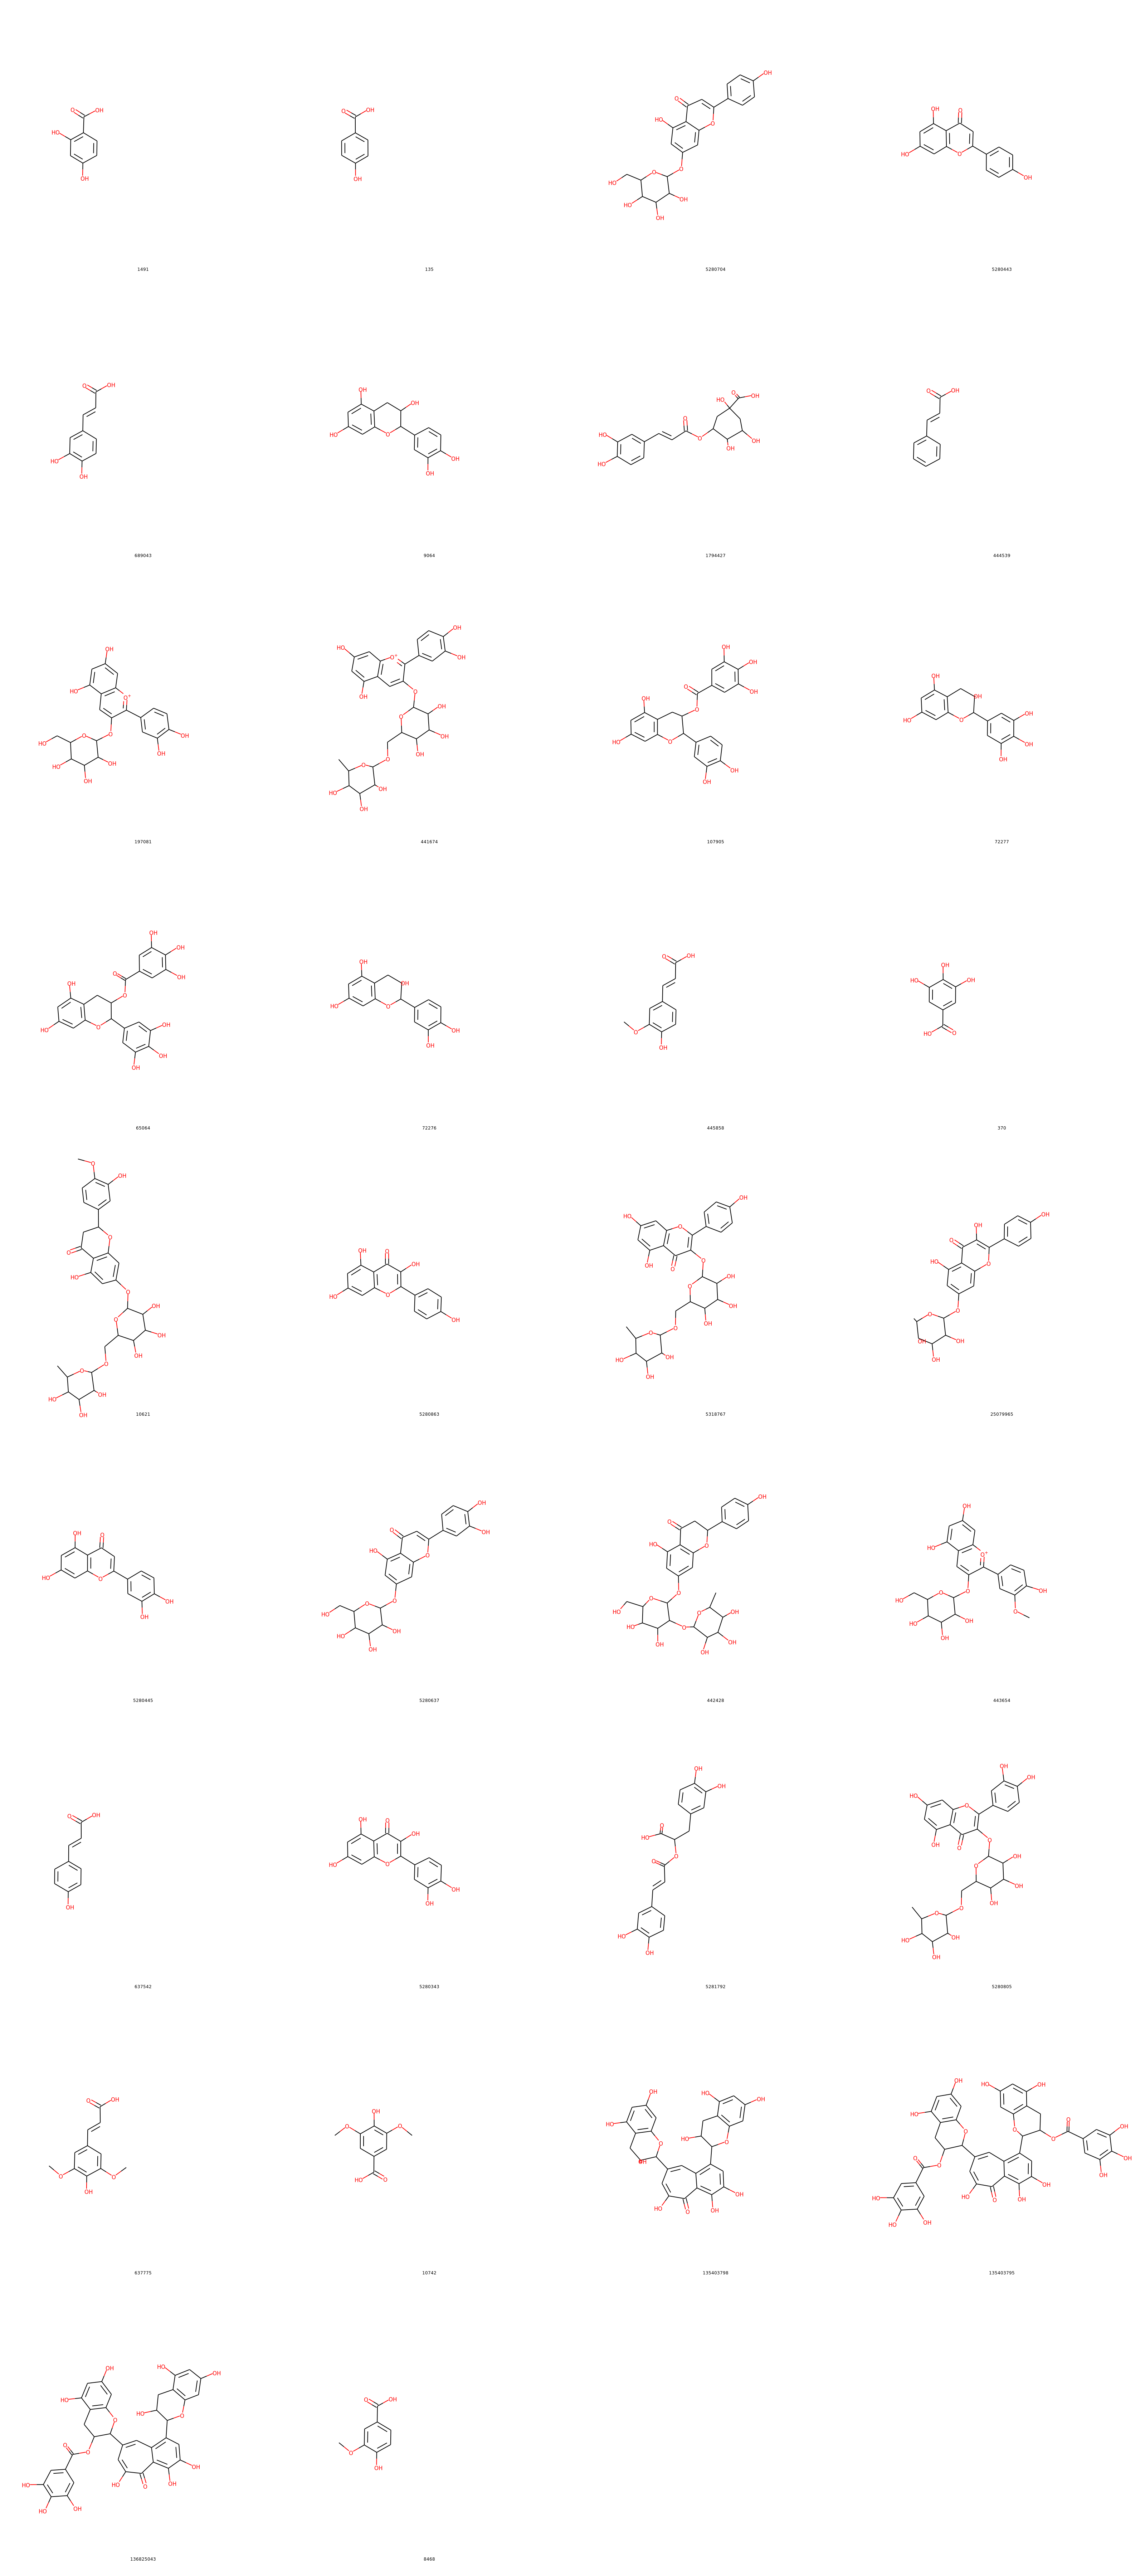

In [14]:
mol_list = Chem.SDMolSupplier('./data/molecules.sdf')
#for m in mol_list: 
img=Draw.MolsToGridImage(mol_list, molsPerRow=4, subImgSize=(800,800), legends=[x.GetProp("_Name") for x in mol_list]) 
img
#img.save('images/cdk2_molgrid.aligned.o.png'))  